<h1>Introduction</h1>
<p>We have a set of housing data for the price that houses were sold in Sydney from Aug-19 to Jul-20. There is also other information along with the house sale. Can we use the other information to predict what the final price will be? What strategy would we give a home seller to get maximum value for his property sale?</p>

<h1>Load the data</h1>
<p>Load the data and make sure all the formats are correct (i.e. dates are of type date). Remove data with no price information.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
# Read CSV
house_csv = "Sydney-Housing.csv"
df = pd.read_csv(house_csv)
df.shape

(10989, 12)

In [3]:
# Are all the data types correct? What are they?
df.dtypes

date        object
suburb      object
address     object
action      object
price        int64
profile     object
bed          int64
url         object
bath       float64
car        float64
size       float64
photo      float64
dtype: object

In [4]:
# Convert date into date type
import datetime
df['date_str'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
df.drop(['date'], axis=1, inplace=True)
df.rename(columns = {'date_str':'date'}, inplace=True)

In [5]:
# How many values are missing?
df.isna().sum()

suburb        0
address       0
action        0
price         0
profile       0
bed           0
url           0
bath         70
car        1162
size       4965
photo      1040
date          0
dtype: int64

In [6]:
# Find many records have no house price?
(df['price']==0).sum()

2288

In [7]:
# Remove rows with price = 0
indexNames = df[ df['price'] == 0].index
df.drop(indexNames , inplace=True)
df.shape

(8701, 12)

In [8]:
df.sample(10)

,suburb,address,action,price,profile,bed,url,bath,car,size,photo,date
3362,Coogee,1/55-57 Carr St,Sold prior to auction,1400000,Unit,2,https://www.domain.com.au/1-55-57-carr-street-...,2.0,1.0,NaN,14.0,2019-11-02
397,Gladesville,7 Brereton St,Sold,2204000,House,5,https://www.domain.com.au/7-brereton-street-gl...,2.0,4.0,638.0,10.0,2019-08-17
9213,Epping,2/64-66 Chester St,Sold prior to auction,1190000,Townhouse,3,https://www.domain.com.au/2-64-chester-street-...,2.0,2.0,NaN,12.0,2020-04-18
6037,Warwick Farm,11 Tripp St,Sold,905000,House,7,https://www.domain.com.au/11-tripp-place-warwi...,3.0,3.0,702.0,9.0,2019-12-14
5805,Drummoyne,3/30 Wrights Rd,Sold,1335000,Townhouse,2,https://www.domain.com.au/3-30-wrights-road-dr...,2.0,2.0,NaN,6.0,2019-12-14
4892,Camperdown,4/6-8 Northwood St,Sold prior to auction,850000,Unit,1,https://www.domain.com.au/4-6-8-northwood-stre...,1.0,1.0,NaN,11.0,2019-11-30
672,Maroubra,19 Hereward St,Sold prior to auction,2195000,House,4,https://domain.com.au/property-profile/19-here...,3.0,1.0,NaN,NaN,2019-08-24
8566,Yagoona,25 Glassop St,Sold,890000,House,4,https://www.domain.com.au/25-glassop-street-ya...,1.0,2.0,5311.0,9.0,2020-03-21
8646,Earlwood,26 Prince Edward Av,Sold,1672000,House,4,https://www.domain.com.au/26-prince-edward-ave...,2.0,4.0,6955.0,8.0,2020-03-28
1100,Colebee,9 Woodhall Cl,Sold prior to auction,1250000,House,4,https://www.domain.com.au/9-woodhall-close-col...,3.0,2.0,9379.0,20.0,2019-09-07


In [9]:
df.describe()


,price,bed,bath,car,size,photo
count,8.701000e+03,8701.000000,8646.000000,7795.000000,4.856000e+03,7929.000000
mean,1.383710e+06,3.179864,1.774809,1.792431,2.312496e+03,9.713331
std,7.497633e+05,1.187943,0.813887,0.922320,2.132793e+04,4.097534
min,1.655000e+05,0.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,8.770000e+05,2.000000,1.000000,1.000000,4.180000e+02,7.000000
50%,1.220000e+06,3.000000,2.000000,2.000000,6.325000e+02,9.000000
75%,1.672000e+06,4.000000,2.000000,2.000000,9.420000e+02,11.000000
max,1.120000e+07,12.000000,7.000000,9.000000,1.011714e+06,67.000000


In [10]:
print("Date range from ", df['date'].min(), " to ", df['date'].max())
df.dtypes

Date range from  2019-08-03 00:00:00  to  2020-07-18 00:00:00


suburb             object
address            object
action             object
price               int64
profile            object
bed                 int64
url                object
bath              float64
car               float64
size              float64
photo             float64
date       datetime64[ns]
dtype: object

<h1>Exploratory Data Analysis</h1>
<P>Let's look at the data to see if we can find anything interesting...</p>
<h2>First get an overview</h2>

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,8701.0,1.383710e+06,749763.317452,165500.0,877000.0,1220000.0,1672000.0,11200000.0
bed,8701.0,3.179864e+00,1.187943,0.0,2.0,3.0,4.0,12.0
bath,8646.0,1.774809e+00,0.813887,1.0,1.0,2.0,2.0,7.0
car,7795.0,1.792431e+00,0.922320,1.0,1.0,2.0,2.0,9.0
size,4856.0,2.312496e+03,21327.934356,1.0,418.0,632.5,942.0,1011714.0
photo,7929.0,9.713331e+00,4.097534,1.0,7.0,9.0,11.0,67.0


In [12]:
df.corr()

,price,bed,bath,car,size,photo
price,1.000000,0.389040,0.411689,0.220076,0.004893,0.317194
bed,0.389040,1.000000,0.671778,0.450680,0.018382,0.231493
bath,0.411689,0.671778,1.000000,0.356560,0.003408,0.278490
car,0.220076,0.450680,0.356560,1.000000,0.008178,0.171715
size,0.004893,0.018382,0.003408,0.008178,1.000000,0.019938
photo,0.317194,0.231493,0.278490,0.171715,0.019938,1.000000


<h2>Categorical data: Profile</h2>

In [13]:
df['profile'].value_counts()

House        5793
Unit         2190
Townhouse     316
Villa         141
Semi          120
Duplex         72
Terrace        56
Studio         13
Name: profile, dtype: int64

In [14]:
#pie = df["profile"].value_counts().rename_axis('profile').reset_index(name='counts')
#print(pie)
#print(pie['profile'])
#plt.pie(pie['counts'],labels=pie['profile'])
#plt.show()

In [15]:
df.groupby('profile').mean()['price']

profile
Duplex       1.265778e+06
House        1.534347e+06
Semi         1.427212e+06
Studio       7.475000e+05
Terrace      1.827321e+06
Townhouse    1.156669e+06
Unit         1.039498e+06
Villa        9.555248e+05
Name: price, dtype: float64

In [16]:
pdf = df.groupby('profile').mean()["price"]
pdict = pdf.to_dict()
#
# Let's try adding in to see if it helps with correlation
#
df['profile_avg'] = df['profile'].apply(lambda x: pdict[x])
df.corr()

,price,bed,bath,car,size,photo,profile_avg
price,1.000000,0.389040,0.411689,0.220076,0.004893,0.317194,0.303530
bed,0.389040,1.000000,0.671778,0.450680,0.018382,0.231493,0.598061
bath,0.411689,0.671778,1.000000,0.356560,0.003408,0.278490,0.268906
car,0.220076,0.450680,0.356560,1.000000,0.008178,0.171715,0.358759
size,0.004893,0.018382,0.003408,0.008178,1.000000,0.019938,0.019855
photo,0.317194,0.231493,0.278490,0.171715,0.019938,1.000000,0.167653
profile_avg,0.303530,0.598061,0.268906,0.358759,0.019855,0.167653,1.000000


In [17]:
# Seems to be a reasonable predictor, so let's keep it

<h2>Categorical data: Subrub</h2>

In [18]:
# Check out some of the categorical values
# Suburb
df['suburb'].value_counts()

Epping         121
Surry Hills    109
Newtown        101
Strathfield     99
Castle Hill     99
              ... 
Toowoon Bay      1
Blackheath       1
Gwandalan        1
St Marys         1
Colebee          1
Name: suburb, Length: 580, dtype: int64

In [19]:
# What is the average price per suburb?
df.groupby('suburb').mean().sort_values(by='price')


,price,bed,bath,car,size,photo,profile_avg
suburb,,,,,,,
Carramar,4.000000e+05,3.000000,1.000000,1.000000,NaN,12.00,1.039498e+06
West Gosford,4.250000e+05,3.000000,1.000000,1.000000,NaN,7.00,1.156669e+06
Whalan,4.255000e+05,3.000000,1.000000,1.500000,663.50,8.00,1.534347e+06
Niagara Park,4.350000e+05,3.000000,1.000000,1.000000,NaN,6.00,1.156669e+06
Airds,4.393750e+05,3.500000,1.000000,1.000000,526.75,10.75,1.534347e+06
...,...,...,...,...,...,...,...
Milsons Point,3.764286e+06,2.714286,2.285714,2.000000,370.00,10.50,1.039498e+06
Vaucluse,3.939500e+06,3.166667,1.833333,2.166667,502.50,13.40,1.369398e+06
Palm Beach,4.087500e+06,3.500000,2.000000,2.000000,1011.50,14.50,1.534347e+06


In [20]:
sdf = df.groupby('suburb').mean()["price"]
sdict = sdf.to_dict()
print(sdf)
#
# Let's try adding in to see if it helps with correlation
#
df['suburb_avg'] = df['suburb'].apply(lambda x: sdict[x])
df.corr()

suburb
Abbotsbury        1.091250e+06
Abbotsford        1.579278e+06
Acacia Gardens    9.610000e+05
Airds             4.393750e+05
Alexandria        1.111208e+06
                      ...     
Wyong             4.500000e+05
Yagoona           9.017590e+05
Yarrawarrah       1.058250e+06
Yowie Bay         2.114202e+06
Zetland           1.133722e+06
Name: price, Length: 580, dtype: float64


,price,bed,bath,car,size,photo,profile_avg,suburb_avg
price,1.000000,0.389040,0.411689,0.220076,0.004893,0.317194,0.303530,0.601290
bed,0.389040,1.000000,0.671778,0.450680,0.018382,0.231493,0.598061,0.037904
bath,0.411689,0.671778,1.000000,0.356560,0.003408,0.278490,0.268906,0.159591
car,0.220076,0.450680,0.356560,1.000000,0.008178,0.171715,0.358759,0.016969
size,0.004893,0.018382,0.003408,0.008178,1.000000,0.019938,0.019855,0.001657
photo,0.317194,0.231493,0.278490,0.171715,0.019938,1.000000,0.167653,0.147148
profile_avg,0.303530,0.598061,0.268906,0.358759,0.019855,0.167653,1.000000,-0.034048
suburb_avg,0.601290,0.037904,0.159591,0.016969,0.001657,0.147148,-0.034048,1.000000


In [21]:
print("Rows before we remove suburbs", df.shape[0])
column = 'suburb'
min_freq = 10
freq = df[column].value_counts()
# Select frequent values. Value is in the index.
frequent_values = freq[freq >= min_freq].index
#print(frequent_values)
# Return only rows with value frequency above threshold.
df['keep'] =  (df[column].isin(frequent_values))
df = df[df.keep]
#x = df.drop(df[column].isin(frequent_values), axis=0, inplace=True)
df.drop(['keep'], axis=1, inplace=True)
#print(df['suburb'].value_counts())
print("ROws after we remove suburbs", df.shape[0])

Rows before we remove suburbs 8701
ROws after we remove suburbs 7535


In [22]:
df['suburb'].value_counts()

Epping            121
Surry Hills       109
Newtown           101
Strathfield        99
Castle Hill        99
                 ... 
Hoxton Park        10
Edensor Park       10
Cabarita           10
Lane Cove West     10
Homebush West      10
Name: suburb, Length: 263, dtype: int64

<h2>Categorical data: Date</h2>

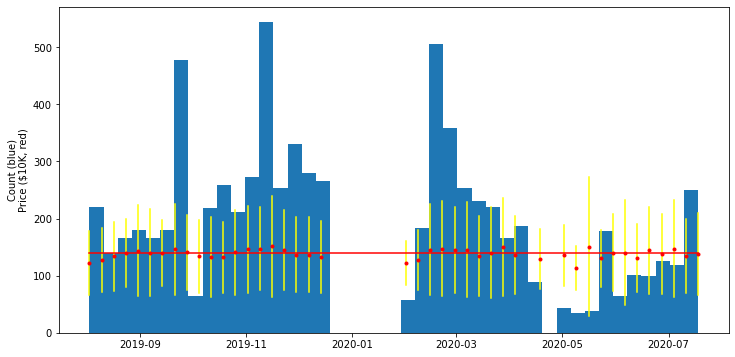

In [23]:
# Check out some of the categorical values
# date of sale
difdates = len(df['date'].value_counts())
plt.figure(figsize=(12,6))
plt.hist(df['date'], bins=difdates)
#
# Add average sale value
for i in df['date'].unique():
    y = df[df['date'] == i].mean()['price']/10000
    s = df[df['date'] == i].std()['price']/10000
    plt.plot([i,i], [y-s,y+s],color="yellow")
    plt.plot(i,y,marker='.',color="red")
# Add line for annual average
m = df.mean()['price']/10000
plt.plot([df['date'].iat[1], df['date'].iat[-1]], [m,m], color="red")
plt.ylabel("Count (blue)\nPrice ($10K, red)")
plt.show()


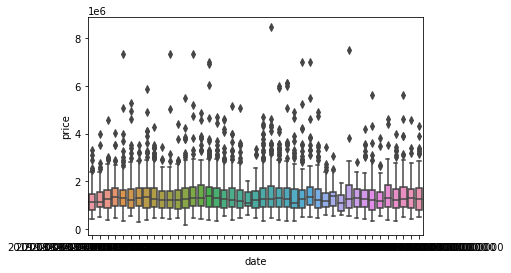

In [24]:
sns.boxplot(x="date", y="price", data=df)

<h2>Categorical data: When sold</h2>
<p>Does the time of sale (relative to auction) make a statistical difference to the amount the house is sold for? i.e. Would we recommend taking an offer BEFORE an auction?</p>

In [25]:
# Does the time of sale (i.e. pre, at, post auction) make a difference
#
#
df['action'].value_counts()

Sold                     4508
Sold prior to auction    2956
Sold after auction         71
Name: action, dtype: int64

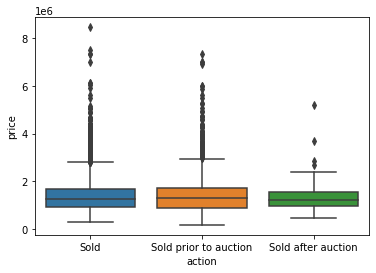

In [26]:
# Box plots
sns.boxplot(x="action", y="price", data=df)

In [27]:
# Function to run similation normal populations
debug = False

def test_hyp(df, whensold, sample, dists):
    pmean = df.mean()["price"]
    pstd = df.std()["price"]
    smean = df[df['action']==whensold].mean()["price"]
    print(whensold, ":")
    print("Population(mean=", pmean, ", std=", pstd, ")")
    print("Test population(mean=", smean, ", std=", df[df['action']==whensold].std()["price"], "n=", df[df['action']==whensold].shape[0], ")"
)
    if (debug):
        print("Sample(size=",sample,", iterations=", dists, ")")
        if (smean > pmean):
            print("<<<")
        else:
            print(">>>")
    count = 0
    for i in range(dists):
        data = np.random.normal(pmean, pstd, size=sample)
        #print(smean, data.mean(), data.std())
        if (smean > pmean):
            if (smean < data.mean()):
                count += 1
        if (smean < pmean):
            if (smean > data.mean()):
                count += 1
    if (debug):
        print("number mean>ours is", count, count/dists)
    print("Confidence this sample is from the population is ", count/dists)
    return count/dists

sample = 4000
dists = 100000
trial = "Sold prior to auction"
test_hyp(df, trial, sample, dists)
trial = "Sold"
test_hyp(df, trial, sample, dists)
trial = "Sold after auction"
test_hyp(df, trial, sample, dists)

most =  df[df['action']=="Sold prior to auction"].mean()["price"]
print()
print("Max is prior to auction: ", most)
a = df[df['action']=="Sold"].mean()["price"]
print("At action is: ", a, "(", (most-a)/most, ")")
a = df[df['action']=="Sold after auction"].mean()["price"]
print("After action is: ", a, "(", (most-a)/most, ")")



Sold prior to auction :
Population(mean= 1398079.606104844 , std= 717948.8698995807 )
Test population(mean= 1420609.9668470907 , std= 728581.5816911198 n= 2956 )
Confidence this sample is from the population is  0.02392
Sold :
Population(mean= 1398079.606104844 , std= 717948.8698995807 )
Test population(mean= 1383672.6419698314 , std= 710649.2106800305 n= 4508 )
Confidence this sample is from the population is  0.10237
Sold after auction :
Population(mean= 1398079.606104844 , std= 717948.8698995807 )
Test population(mean= 1374795.7746478873 , std= 719012.2668209731 n= 71 )
Confidence this sample is from the population is  0.0202

Max is prior to auction:  1420609.9668470907
At action is:  1383672.6419698314 ( 0.026001031767528857 )
After action is:  1374795.7746478873 ( 0.03224966265785371 )


In [28]:
# Let's try adding in to see if it helps with correlation
#
def choose(action):
    if (action == "Sold prior to auction"):
        return 1543138
    if (action == "Sold"):
        return 1442831
    return 1513322

df['when'] = df['action'].apply(lambda x: choose(x))
df.corr()

,price,bed,bath,car,size,photo,profile_avg,suburb_avg,when
price,1.000000,0.417445,0.415261,0.227189,0.000968,0.333738,0.351659,0.555037,0.024806
bed,0.417445,1.000000,0.669587,0.458535,0.038288,0.220070,0.607811,0.038407,-0.095767
bath,0.415261,0.669587,1.000000,0.354852,0.001090,0.265329,0.276883,0.138150,0.001599
car,0.227189,0.458535,0.354852,1.000000,0.034455,0.150332,0.370157,-0.000985,-0.077392
size,0.000968,0.038288,0.001090,0.034455,1.000000,-0.019971,0.047246,-0.062925,-0.041109
photo,0.333738,0.220070,0.265329,0.150332,-0.019971,1.000000,0.169831,0.145740,0.058781
profile_avg,0.351659,0.607811,0.276883,0.370157,0.047246,0.169831,1.000000,-0.006628,-0.138677
suburb_avg,0.555037,0.038407,0.138150,-0.000985,-0.062925,0.145740,-0.006628,1.000000,0.149138
when,0.024806,-0.095767,0.001599,-0.077392,-0.041109,0.058781,-0.138677,0.149138,1.000000


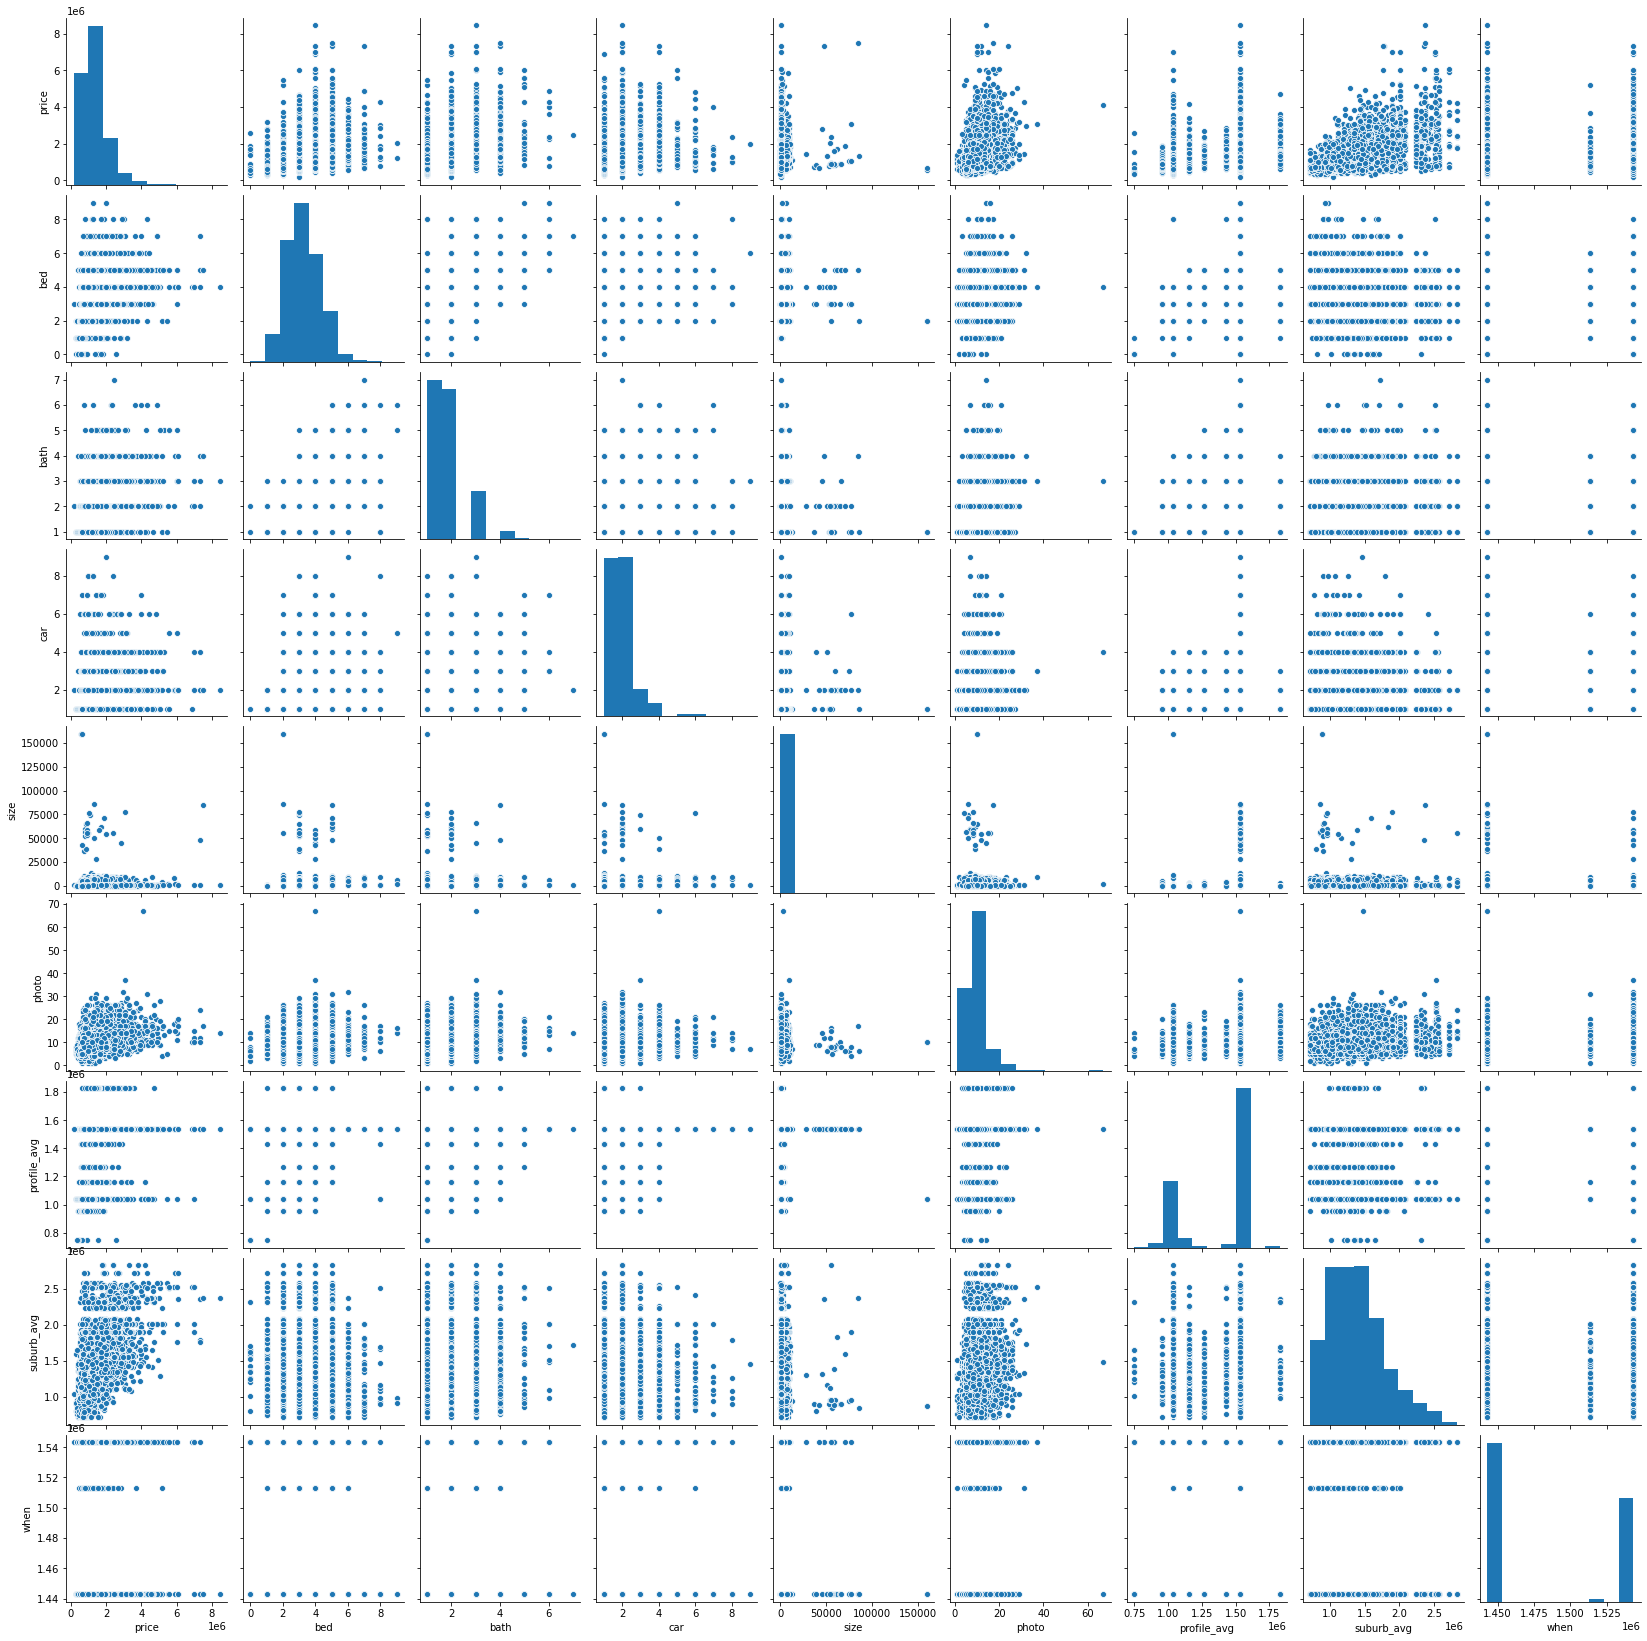

In [29]:
sns.pairplot(df)

In [30]:
# Not enough values in "when" for linear regression, so let's loose it
df.drop(['when'], axis=1, inplace=True)
# Check that the column has gone
df.dtypes

suburb                 object
address                object
action                 object
price                   int64
profile                object
bed                     int64
url                    object
bath                  float64
car                   float64
size                  float64
photo                 float64
date           datetime64[ns]
profile_avg           float64
suburb_avg            float64
dtype: object

<h2>Conclusions</h2><ul><li>Highest correleation is between number of baths, then photos of the property.</li><li>There is not much correlation between price & size of property - this doesn't "feel" right. Let's look at this relationship in more detail.</li></ul>

In [31]:
df.corr()

,price,bed,bath,car,size,photo,profile_avg,suburb_avg
price,1.000000,0.417445,0.415261,0.227189,0.000968,0.333738,0.351659,0.555037
bed,0.417445,1.000000,0.669587,0.458535,0.038288,0.220070,0.607811,0.038407
bath,0.415261,0.669587,1.000000,0.354852,0.001090,0.265329,0.276883,0.138150
car,0.227189,0.458535,0.354852,1.000000,0.034455,0.150332,0.370157,-0.000985
size,0.000968,0.038288,0.001090,0.034455,1.000000,-0.019971,0.047246,-0.062925
photo,0.333738,0.220070,0.265329,0.150332,-0.019971,1.000000,0.169831,0.145740
profile_avg,0.351659,0.607811,0.276883,0.370157,0.047246,0.169831,1.000000,-0.006628
suburb_avg,0.555037,0.038407,0.138150,-0.000985,-0.062925,0.145740,-0.006628,1.000000


In [32]:
# How many values are missing?
df.isna().sum()


suburb            0
address           0
action            0
price             0
profile           0
bed               0
url               0
bath             46
car             816
size           3445
photo           657
date              0
profile_avg       0
suburb_avg        0
dtype: int64

In [33]:
df.dropna(inplace=True)
df.corr()

,price,bed,bath,car,size,photo,profile_avg,suburb_avg
price,1.000000,0.323562,0.376180,0.143108,0.010046,0.344715,0.237885,0.656684
bed,0.323562,1.000000,0.658781,0.353024,0.020549,0.228041,0.427497,0.103601
bath,0.376180,0.658781,1.000000,0.281514,-0.008638,0.284242,0.142590,0.210962
car,0.143108,0.353024,0.281514,1.000000,0.038069,0.123119,0.200584,0.012134
size,0.010046,0.020549,-0.008638,0.038069,1.000000,-0.014142,0.047680,-0.050038
photo,0.344715,0.228041,0.284242,0.123119,-0.014142,1.000000,0.121065,0.198787
profile_avg,0.237885,0.427497,0.142590,0.200584,0.047680,0.121065,1.000000,0.043281
suburb_avg,0.656684,0.103601,0.210962,0.012134,-0.050038,0.198787,0.043281,1.000000


In [34]:
# define the target variable (dependent variable) as y
y = df['price']
if 'calc_price' in df.columns:
    df.drop(['calc_price'], axis=1, inplace=True)
if 'error' in df.columns:
    df.drop(['error'], axis=1, inplace=True)

# test data size
test_size = .3
    
# Take all columns except target as predictor columns
predictor_columns = [c for c in df.columns if (c != 'price' and np.issubdtype(df[c].dtype, np.number))]
# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)

## Create training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
X_train = X
y_train = y


In [35]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

from sklearn import linear_model
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = linear_model.LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]],y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - (1 - r2)*(n - 1)/(n-k-1) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = car, bed, photo, suburb_avg, size, bath, profile_avg
(Step) Trying car...
(Step) - Features = car
(Step) - Adjusted R^2: This = 0.020; Best = 0.000
(Step) - New Best!   : Feature = car; R^2 = 0.020; Adjusted R^2 = 0.020
(Step) Trying bed...
(Step) - Features = bed
(Step) - Adjusted R^2: This = 0.104; Best = 0.020
(Step) - New Best!   : Feature = bed; R^2 = 0.105; Adjusted R^2 = 0.104
(Step) Trying photo...
(Step) - Features = photo
(Step) - Adjusted R^2: This = 0.118; Best = 0.104
(Step) - New Best!   : Feature = photo; R^2 = 0.119; Adjusted R^2 = 0.118
(Step) Trying suburb_avg...
(Step) - Features = suburb_avg
(Step) - Adjusted R^2: This = 0.431; Best = 0.118
(Step) - New Best!   : Feature = suburb_avg; R^2 = 0.431; Adjusted R^2 = 0.431
(Step) Trying size...
(Step) - Features = size
(Step) - Adjusted R^2: This = -0.001; Best = 0.431
(Step) Trying bath...
(Step) - Features = bath
(Step) - Adjusted R^2: This = 0.141; Best = 0.431
(Step) Trying profile_avg...
(Step) - 

In [36]:
#
# So lets create our model based on the features we found
# Let's use  results
features_to_use = 4
ourcols = included[0:features_to_use]
print("Using ", ourcols," for our coefficient calculations.")
X = df[ourcols] 
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
#
# Train our model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

r2 = regr.score(X_train,y_train)
print("Coef ", r2 ** 0.5)


Using  ['suburb_avg', 'bed', 'photo', 'profile_avg']  for our coefficient calculations.
Intercept: 
 -1497756.213263806
Coefficients: 
 [1.08173729e+00 1.20054406e+05 3.16580686e+04 5.29750434e-01]
Coef  0.7249965471732934


In [49]:
# Calculate suburb starting prices
x = 0
print(included[x], " values are")
print(sdf * regr.coef_[x] / 1000)

def psub(sub):
    try:
        print(sub, ": ", sdf[sub] * regr.coef_[x] / 1000)
    except:
        print(sub, ": Not enough data")
        
print("-------------------------------------")
psub("Carramar")
psub("Claremont Meadows")
psub("Epping")
psub("Hornsby")
psub("Manly")
psub("Milsons Point")
psub("Sydney")
psub("Surry Hills")
psub("Vaucluse")
psub("Zetland")

psub("Pymble")
psub("Henley")
psub("Marsfield")

suburb_avg  values are
suburb
Abbotsbury        1180.445820
Abbotsford        1708.363667
Acacia Gardens    1039.549538
Airds              475.288323
Alexandria        1202.034643
                     ...     
Wyong              486.781781
Yagoona            975.466339
Yarrawarrah       1144.748489
Yowie Bay         2287.011147
Zetland           1226.389607
Name: price, Length: 580, dtype: float64
-------------------------------------
Carramar :  432.69491687948226
Claremont Meadows : Not enough data
Epping :  1723.867276821003
Hornsby :  1344.3290198799414
Manly :  2177.5656359668415
Milsons Point :  4071.968235633699
Sydney :  1366.7750686930647
Surry Hills :  1447.92521399865
Vaucluse :  4261.504062616801
Zetland :  1226.389606772166
Pymble :  2420.811115368574
Henley :  5322.147477617632
Marsfield :  1284.0930994327946


In [38]:
# Calculate type starting prices
x = 3
print(included[x], " values are")
print(pdf * regr.coef_[x] / 1000)

profile_avg  values are
profile
Duplex       670.546327
House        812.821173
Semi         756.066441
Studio       395.988449
Terrace      968.024320
Townhouse    612.746149
Unit         550.674598
Villa        506.189690
Name: price, dtype: float64


In [39]:
df['calc_price'] = regr.intercept_
for i in range(features_to_use):
    df['calc_price'] += df[included[i]] * regr.coef_[i]
    print("Feature ", included[i], " value is ", regr.coef_[i])
#+ df[included[0]] * regr.coef_[0] + df[included[1]] * regr.coef_[1] + df[included[2]] * regr.coef_[2] + df[included[3]] * regr.coef_[3]
df['error'] = df['price'] - df['calc_price']

Feature  suburb_avg  value is  1.0817372921987056
Feature  bed  value is  120054.40552187948
Feature  photo  value is  31658.06860992354
Feature  profile_avg  value is  0.5297504339832813


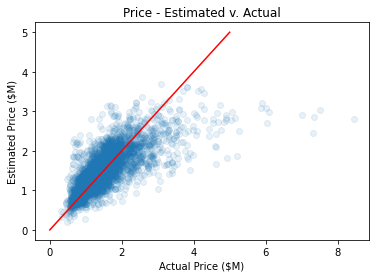

In [55]:
plt.scatter(df['price']/1000000, df['calc_price']/1000000, alpha=0.1)
plt.plot((0,5),(0,5),color="red")
plt.xlabel("Actual Price ($M)")
plt.ylabel("Estimated Price ($M)")
plt.title("Price - Estimated v. Actual")
plt.show()

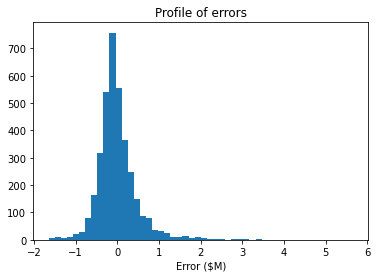

In [56]:
plt.hist(df['error']/1000000, bins=50)
plt.xlabel("Error ($M)")
plt.title("Profile of errors")
plt.show()

No handles with labels found to put in legend.


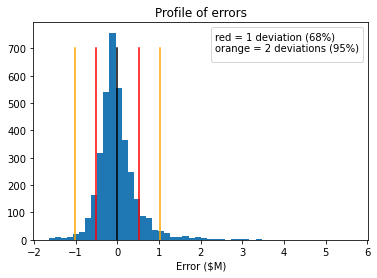

In [68]:
plt.hist(df['error']/1000000, bins=50)
m = df['error'].mean()/1000000
s = df['error'].std()/1000000
plt.plot((m,m), (0,700), color="black")
plt.plot((m+s,m+s), (0,700), color="red")
plt.plot((m-s,m-s), (0,700), color="red")
plt.plot((m+2*s,m+2*s), (0,700), color="orange")
plt.plot((m-2*s,m-2*s), (0,700), color="orange")
plt.xlabel("Error ($M)")
plt.title("Profile of errors")
plt.legend(title="red = 1 deviation (68%)\norange = 2 deviations (95%)")
plt.show()

In [58]:
print(df.filter(regex="price|calc_price|error"))


         price    calc_price          error
0      1321000  1.035553e+06  285446.837015
1      2380000  1.759184e+06  620816.357832
6      1405000  1.630002e+06 -225002.145470
7      1122500  1.355491e+06 -232990.805472
8      1200000  1.077146e+06  122853.943100
...        ...           ...            ...
10968  1285000  1.586159e+06 -301158.728496
10974  1250000  2.193763e+06 -943762.893563
10982  1000000  7.191842e+05  280815.824565
10984  4300000  3.451963e+06  848037.140492
10988  1690000  1.739626e+06  -49625.892759

[3594 rows x 3 columns]
Mean error 65.53715562718233


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3594.0,1.513315e+06,747141.470075,3.100000e+05,9.860000e+05,1.375000e+06,1.800000e+06,8.460000e+06
bed,3594.0,3.557318e+00,1.059685,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
bath,3594.0,1.894825e+00,0.843476,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00
car,3594.0,1.942126e+00,0.958934,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
size,3594.0,2.025106e+03,6477.122199,3.400000e+01,4.522500e+02,6.580000e+02,9.610000e+02,1.593940e+05
photo,3594.0,9.946299e+00,4.226361,1.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01,6.700000e+01
profile_avg,3594.0,1.479295e+06,155605.136479,9.555248e+05,1.534347e+06,1.534347e+06,1.534347e+06,1.827321e+06
suburb_avg,3594.0,1.373158e+06,407410.359065,7.162600e+05,1.073513e+06,1.314011e+06,1.643111e+06,2.827000e+06
calc_price,3594.0,1.513250e+06,541030.277829,1.960290e+05,1.084847e+06,1.448895e+06,1.861328e+06,3.697890e+06
error,3594.0,6.553716e+01,508670.079075,-1.651771e+06,-2.597506e+05,-6.996201e+04,1.743013e+05,5.650374e+06
